# Introductie tot Kansrekening en Statistiek
In dit notebook gaan we aan de slag met enkele concepten die we eerder hebben besproken. Veel concepten uit kansrekening en statistiek zijn goed vertegenwoordigd in belangrijke bibliotheken voor gegevensverwerking in Python, zoals `numpy` en `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Willekeurige Variabelen en Verdelingen
Laten we beginnen met het trekken van een steekproef van 30 waarden uit een uniforme verdeling van 0 tot 9. We zullen ook het gemiddelde en de variantie berekenen.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Om visueel in te schatten hoeveel verschillende waarden er in de steekproef zijn, kunnen we de **histogram** plotten:


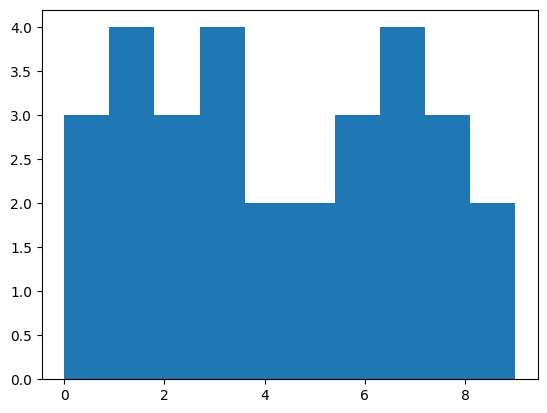

In [119]:
plt.hist(sample)
plt.show()

## Analyseren van echte gegevens

Gemiddelde en variantie zijn erg belangrijk bij het analyseren van gegevens uit de echte wereld. Laten we de gegevens over honkbalspelers laden van [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


We gebruiken hier een pakket genaamd [**Pandas**](https://pandas.pydata.org/) voor data-analyse. Later in deze cursus zullen we meer praten over Pandas en het werken met data in Python.

Laten we gemiddelde waarden berekenen voor leeftijd, lengte en gewicht:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Laten we ons nu richten op lengte, en de standaarddeviatie en variantie berekenen:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Naast het gemiddelde is het logisch om naar de mediaanwaarde en kwartielen te kijken. Deze kunnen worden weergegeven met een **boxplot**:


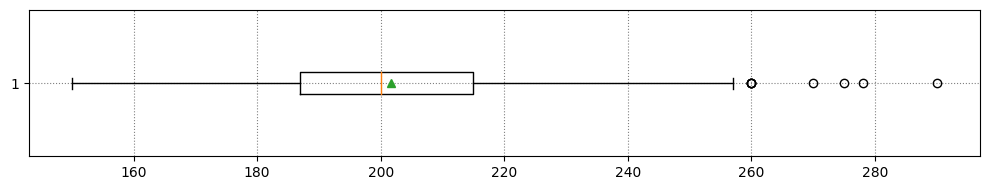

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

We kunnen ook boxplots maken van subsets van onze dataset, bijvoorbeeld gegroepeerd op spelersrol.


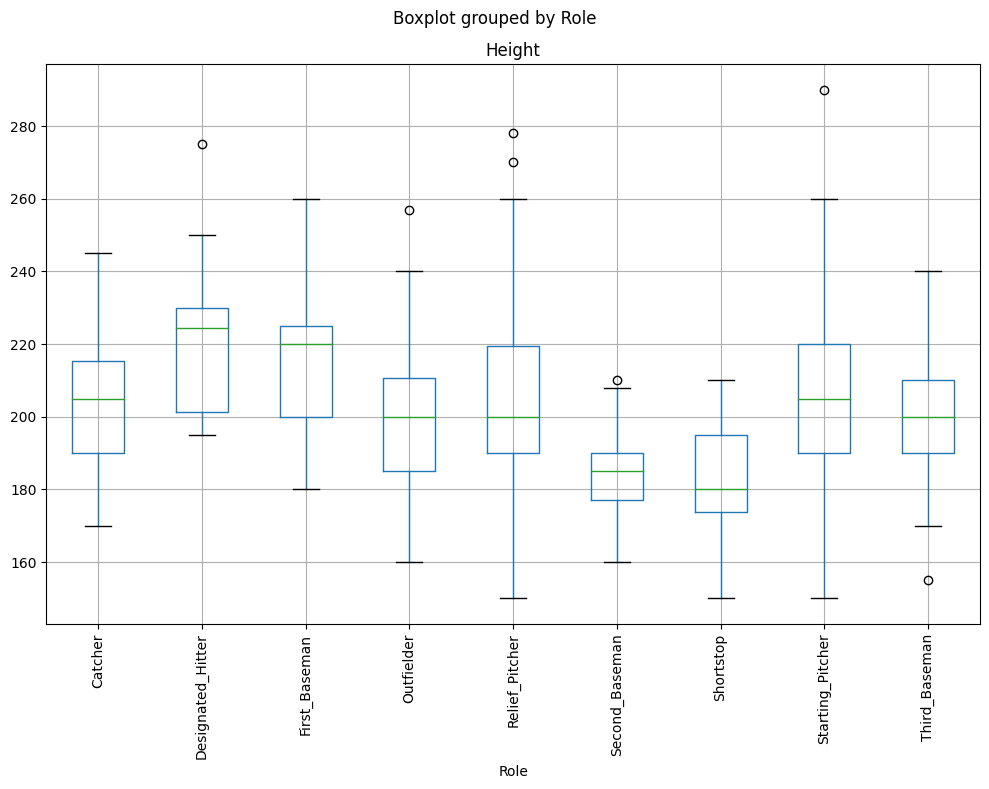

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Opmerking**: Dit diagram suggereert dat de gemiddelde lengte van eerste honkspelers hoger is dan die van tweede honkspelers. Later zullen we leren hoe we deze hypothese formeler kunnen testen en hoe we kunnen aantonen dat onze gegevens statistisch significant zijn om dit te bewijzen.  

Leeftijd, lengte en gewicht zijn allemaal continue willekeurige variabelen. Wat denk je dat hun verdeling is? Een goede manier om dit te ontdekken is door het histogram van de waarden te plotten:


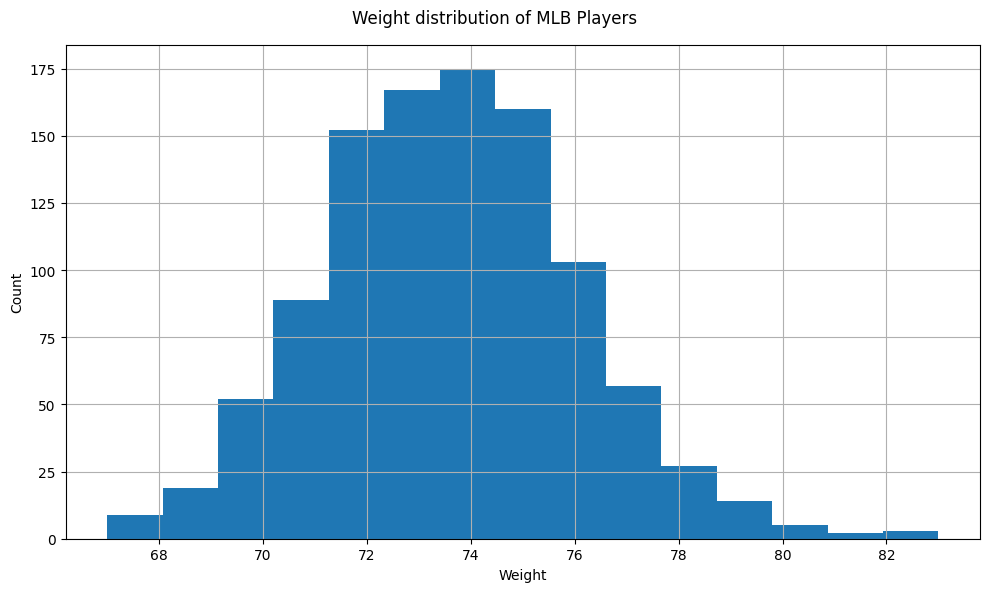

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normale verdeling

Laten we een kunstmatige steekproef van gewichten maken die een normale verdeling volgt met hetzelfde gemiddelde en dezelfde variantie als onze echte gegevens:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

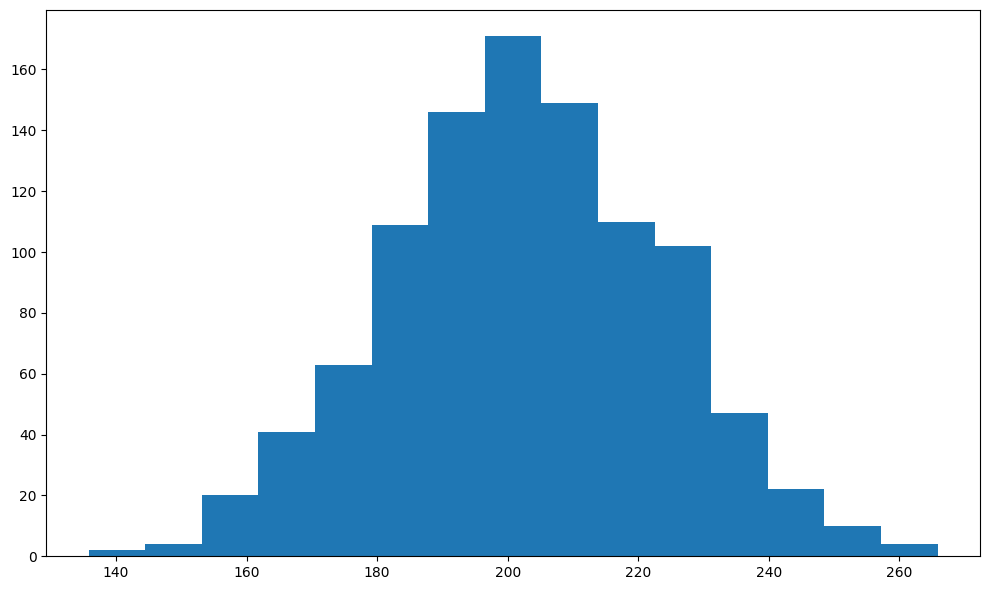

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

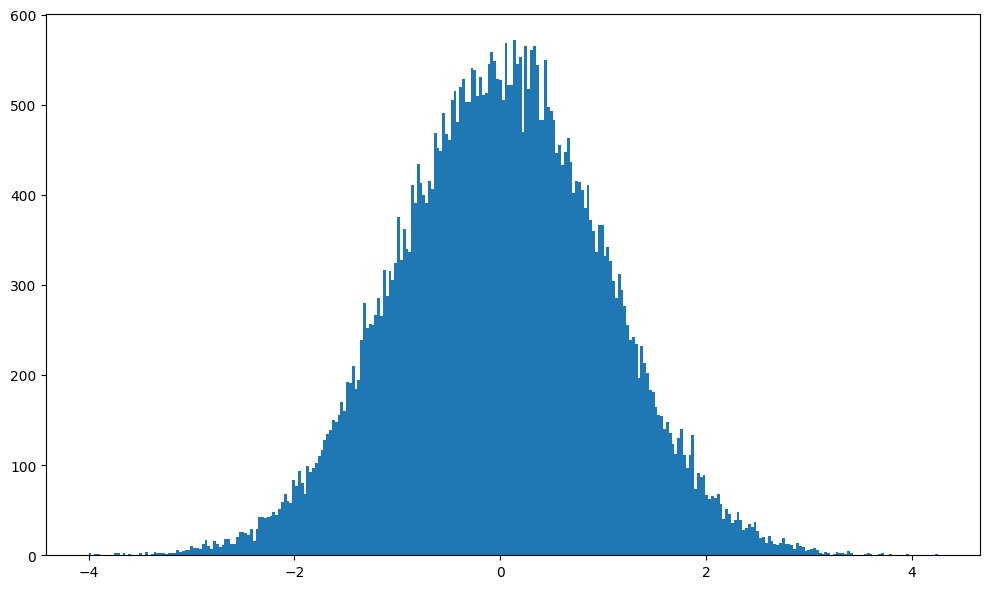

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Aangezien de meeste waarden in het echte leven normaal verdeeld zijn, moeten we geen uniforme willekeurige getallengenerator gebruiken om steekproefgegevens te genereren. Hier is wat er gebeurt als we proberen gewichten te genereren met een uniforme verdeling (gegenereerd door `np.random.rand`):


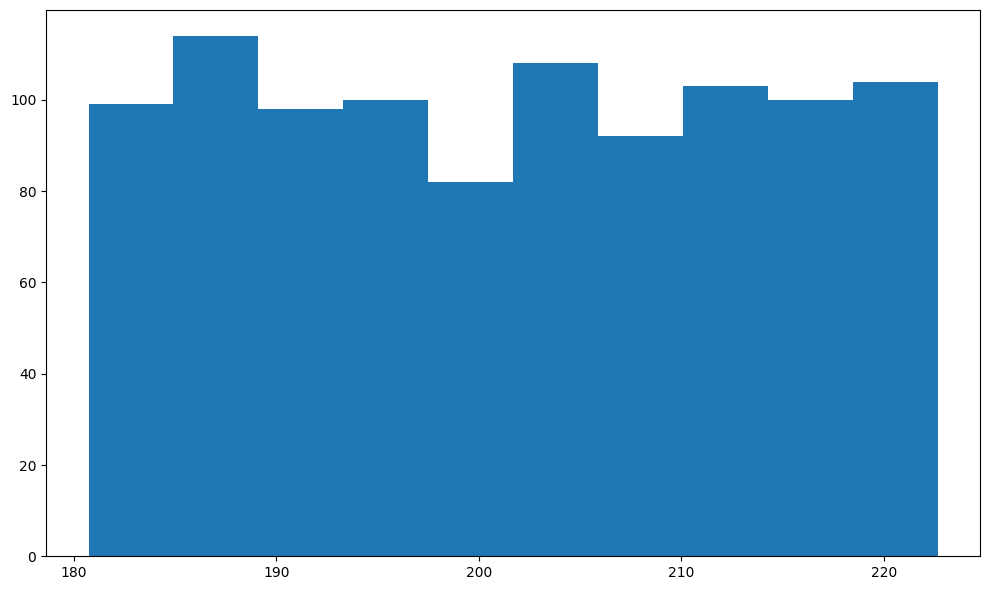

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Betrouwbaarheidsintervallen

Laten we nu betrouwbaarheidsintervallen berekenen voor de gewichten en lengtes van honkbalspelers. We zullen de code gebruiken [uit deze stackoverflow-discussie](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hypothese Toetsen

Laten we de verschillende rollen in onze dataset van honkbalspelers verkennen:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


We kunnen zien dat de intervallen elkaar niet overlappen.

Een statistisch correctere manier om de hypothese te bewijzen is door gebruik te maken van een **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


De twee waarden die door de functie `ttest_ind` worden geretourneerd zijn:  
* De p-waarde kan worden beschouwd als de waarschijnlijkheid dat twee verdelingen hetzelfde gemiddelde hebben. In ons geval is deze erg laag, wat betekent dat er sterk bewijs is dat eerste honkspelers langer zijn.  
* De t-waarde is de genormaliseerde gemiddelde verschilwaarde die wordt gebruikt in de t-test, en deze wordt vergeleken met een drempelwaarde voor een gegeven betrouwbaarheidsniveau.  


## Het simuleren van een normale verdeling met de centrale limietstelling

De pseudo-willekeurige generator in Python is ontworpen om ons een uniforme verdeling te geven. Als we een generator voor een normale verdeling willen maken, kunnen we de centrale limietstelling gebruiken. Om een normaal verdeelde waarde te krijgen, berekenen we gewoon het gemiddelde van een uniform gegenereerde steekproef.


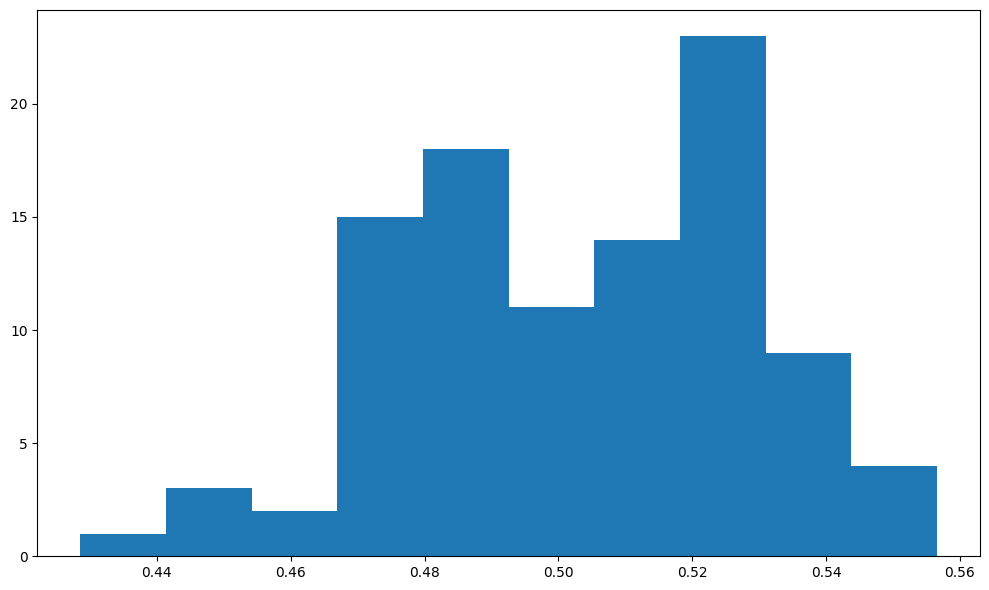

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Correlatie en de Kwaadaardige Baseball Corp

Correlatie stelt ons in staat om relaties tussen gegevensreeksen te vinden. In ons eenvoudige voorbeeld doen we alsof er een kwaadaardige honkbalcorporatie is die haar spelers betaalt op basis van hun lengte - hoe langer de speler, hoe meer geld hij/zij krijgt. Stel dat er een basissalaris is van $1000, en een extra bonus van $0 tot $100, afhankelijk van de lengte. We nemen de echte spelers van MLB en berekenen hun denkbeeldige salarissen:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Laten we nu de covariantie en correlatie van die reeksen berekenen. `np.cov` geeft ons een zogenaamde **covariantiematrix**, wat een uitbreiding is van covariantie naar meerdere variabelen. Het element $M_{ij}$ van de covariantiematrix $M$ is een correlatie tussen invoervariabelen $X_i$ en $X_j$, en de diagonale waarden $M_{ii}$ zijn de variantie van $X_{i}$. Op dezelfde manier geeft `np.corrcoef` ons de **correlatiematrix**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Een correlatie gelijk aan 1 betekent dat er een sterke **lineaire relatie** is tussen twee variabelen. We kunnen de lineaire relatie visueel zien door de ene waarde tegen de andere te plotten:


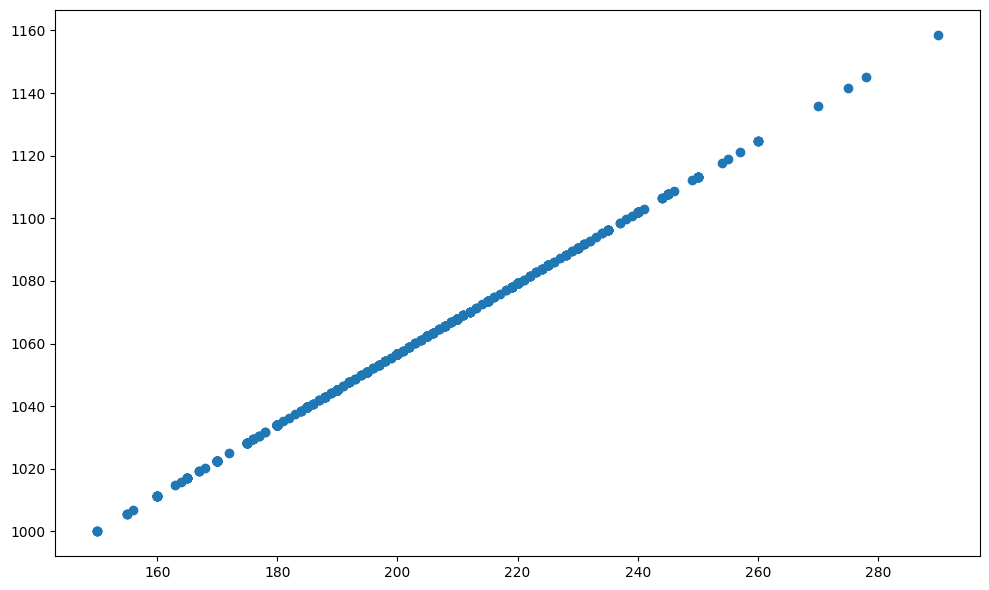

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


In dit geval is de correlatie iets kleiner, maar deze is nog steeds behoorlijk hoog. Nu, om de relatie nog minder duidelijk te maken, willen we misschien wat extra willekeurigheid toevoegen door een willekeurige variabele aan het salaris toe te voegen. Laten we kijken wat er gebeurt:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


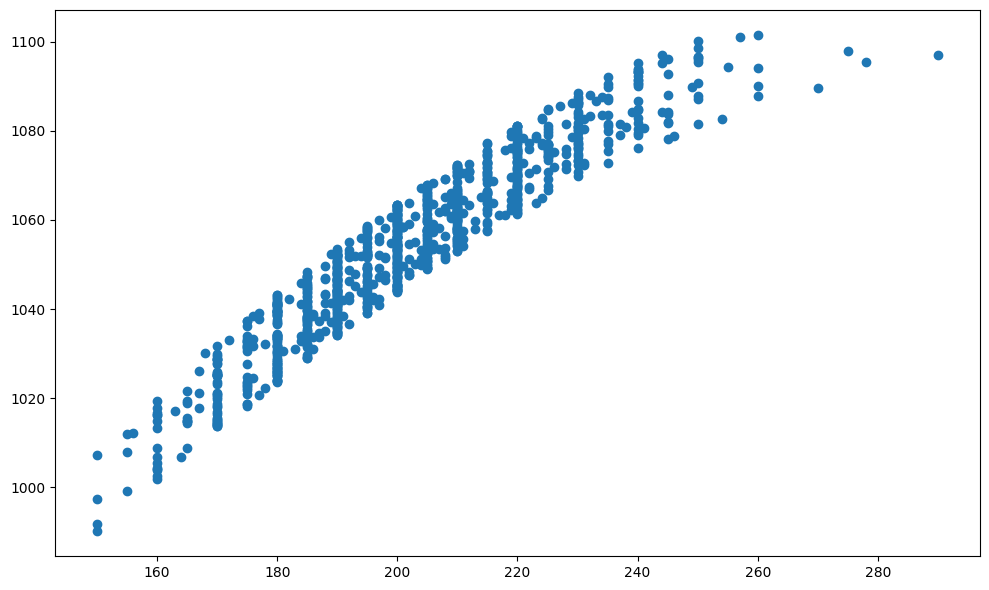

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Kun je raden waarom de stippen zich zo in verticale lijnen opstellen?

We hebben de correlatie waargenomen tussen een kunstmatig ontworpen concept zoals salaris en de waargenomen variabele *lengte*. Laten we ook eens kijken of de twee waargenomen variabelen, zoals lengte en gewicht, ook met elkaar correleren:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Helaas hebben we geen resultaten gekregen - alleen enkele vreemde `nan` waarden. Dit komt doordat sommige waarden in onze reeks niet gedefinieerd zijn, weergegeven als `nan`, wat ervoor zorgt dat het resultaat van de bewerking ook niet gedefinieerd is. Als we naar de matrix kijken, zien we dat de kolom `Weight` het probleem vormt, omdat de zelf-correlatie tussen `Height` waarden is berekend.

> Dit voorbeeld toont het belang van **datapreparatie** en **opschoning**. Zonder correcte data kunnen we niets berekenen.

Laten we de methode `fillna` gebruiken om de ontbrekende waarden in te vullen en de correlatie berekenen:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

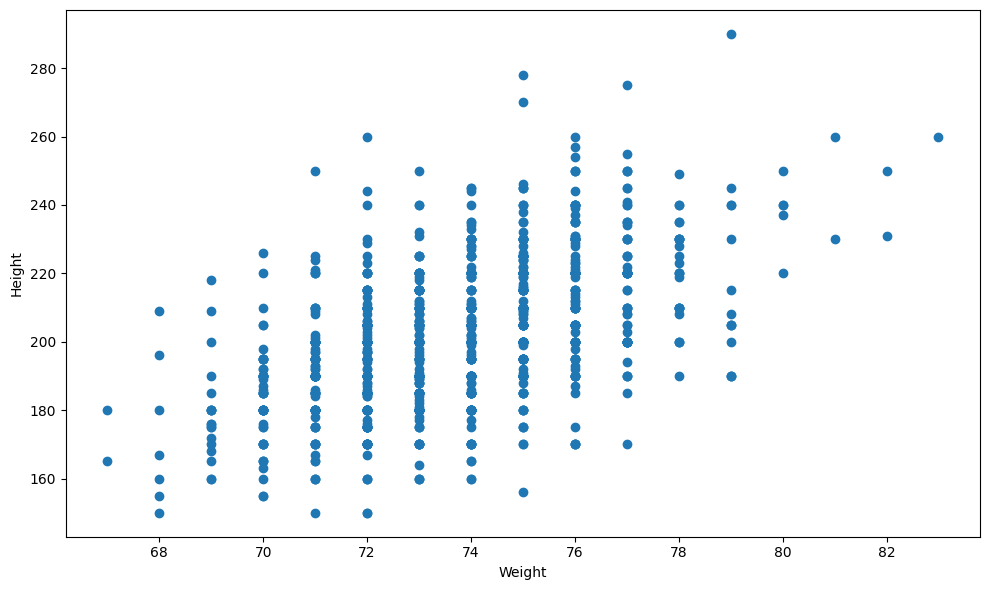

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Conclusie

In dit notebook hebben we geleerd hoe we basisbewerkingen op gegevens kunnen uitvoeren om statistische functies te berekenen. We weten nu hoe we een degelijk apparaat van wiskunde en statistiek kunnen gebruiken om enkele hypothesen te bewijzen, en hoe we betrouwbaarheidsintervallen kunnen berekenen voor willekeurige variabelen op basis van een gegevensmonster.



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in de oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor kritieke informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
